# 02.Processamento de dados

Executar o comando:
```
pip install scikit-learn scipy ipympl matplotlib

jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

<br/>

## Sumarização de atributos do conjunto de dados [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)


* Minímo
* Máximo
* Média
* Mediana
* Desvio padrão
* Distribuição de etiquetas

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)

iris = load_iris(as_frame=True)

iris_X = iris.data
iris_Y = iris.target

# As funções estatisticas abaixo são otimizadas pelo compilador Cython
iris_statistics = pd.DataFrame(data={
    "Min": iris_X.min(),
    "Max": iris_X.max(),
    "Mean": iris_X.mean(),
    "Median": iris_X.median(),
    "Std. Dev.": iris_X.std()
}, index=iris_X.columns)

iris_Y_statistics = iris_Y.value_counts(normalize=True)
iris_Y_statistics.index = [
    iris.target_names[i] for i in iris_Y_statistics.index]

print("Iris statistics:")
display(iris_statistics)
print("\nLabel distribution: ")
display(iris_Y_statistics)
print("\nBox-plot:")

display(iris_X.plot.box(figsize=(8,4)))

Iris statistics:


Min     Max    Mean  Median  Std. Dev.
sepal length (cm) 4.30000 7.90000 5.84333 5.80000    0.82807
sepal width (cm)  2.00000 4.40000 3.05733 3.00000    0.43587
petal length (cm) 1.00000 6.90000 3.75800 4.35000    1.76530
petal width (cm)  0.10000 2.50000 1.19933 1.30000    0.76224


Label distribution: 


virginica    0.33333
versicolor   0.33333
setosa       0.33333
Name: target, dtype: float64


Box-plot:


<AxesSubplot:>

<br/>

## Dados ausentes

Exemplo com o conjunto de dados [Diabetes](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset).
* Descartar linhas com valores nulos
* Valor sentinela
* Imputação de valores
    * Média
    * Interpolação
    * Vizinhos mais próximos

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes(as_frame=True)
diabetes_X = diabetes.data
print("Dados originais ({0}, {1})".format(
    diabetes_X.shape[0],
    diabetes_X.shape[1]))
display(diabetes_X.head())

# Seed null values
diabetes_X_null = diabetes_X.mask(np.random.random(diabetes_X.shape) < .1)

def call_null_seed():
    print("\nAdiciona valores nulos em 10% dos dados ({} campos nulos)".format(
        diabetes_X_null.isnull().sum().sum()))
    display(diabetes_X_null.head())
call_null_seed()

Dados originais (442, 10)


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808  0.05068  0.06170  0.02187 -0.04422 -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441 -0.03949   
2  0.08530  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219  0.02499 -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0  0.01991 -0.01765  
1 -0.06833 -0.09220  
2  0.00286 -0.02593  
3  0.02269 -0.00936  
4 -0.03199 -0.04664


Adiciona valores nulos em 10% dos dados (429 campos nulos)


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808      nan  0.06170      nan      nan -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441      nan   
2      nan  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219      nan -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0      nan      nan  
1      nan -0.09220  
2  0.00286      nan  
3  0.02269 -0.00936  
4 -0.03199 -0.04664

<br/>
Remove linhas com campos nulos

In [3]:
call_null_seed()
diabetes_X_null_dropna = diabetes_X_null.dropna()
print("\nRemove linhas com campos nulos ({} linhas)".format(
    diabetes_X_null_dropna.shape[0]))
display(diabetes_X_null_dropna.head())


Adiciona valores nulos em 10% dos dados (429 campos nulos)


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808      nan  0.06170      nan      nan -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441      nan   
2      nan  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219      nan -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0      nan      nan  
1      nan -0.09220  
2  0.00286      nan  
3  0.02269 -0.00936  
4 -0.03199 -0.04664


Remove linhas com campos nulos (161 linhas)


age      sex      bmi       bp       s1       s2       s3       s4  \
4   0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   
5  -0.09270 -0.04464 -0.04070 -0.01944 -0.06899 -0.07929  0.04128 -0.07639   
6  -0.04547  0.05068 -0.04716 -0.01600 -0.04010 -0.02480  0.00078 -0.03949   
7   0.06350  0.05068 -0.00189  0.06663  0.09062  0.10891  0.02287  0.01770   
10 -0.09633 -0.04464 -0.08381  0.00810 -0.10339 -0.09056 -0.01395 -0.07639   

         s5       s6  
4  -0.03199 -0.04664  
5  -0.04118 -0.09635  
6  -0.06291 -0.03836  
7  -0.03582  0.00306  
10 -0.06291 -0.03421

<br/>
Valor sentinela

In [4]:
call_null_seed()
diabetes_X_null_sentinel = diabetes_X_null.fillna("¯\_(ツ)_/¯")
print("\nPreenche campos vazios com valor sentinela")
display(diabetes_X_null_sentinel.head())


Adiciona valores nulos em 10% dos dados (429 campos nulos)


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808      nan  0.06170      nan      nan -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441      nan   
2      nan  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219      nan -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0      nan      nan  
1      nan -0.09220  
2  0.00286      nan  
3  0.02269 -0.00936  
4 -0.03199 -0.04664


Preenche campos vazios com valor sentinela


age        sex      bmi         bp         s1         s2       s3  \
0    0.03808  ¯\_(ツ)_/¯  0.06170  ¯\_(ツ)_/¯  ¯\_(ツ)_/¯   -0.03482 -0.04340   
1   -0.00188   -0.04464 -0.05147   -0.02633   -0.00845   -0.01916  0.07441   
2  ¯\_(ツ)_/¯    0.05068  0.04445   -0.00567   -0.04560   -0.03419 -0.03236   
3   -0.08906   -0.04464 -0.01160   -0.03666    0.01219  ¯\_(ツ)_/¯ -0.03604   
4    0.00538   -0.04464 -0.03638    0.02187    0.00393    0.01560  0.00814   

          s4         s5         s6  
0   -0.00259  ¯\_(ツ)_/¯  ¯\_(ツ)_/¯  
1  ¯\_(ツ)_/¯  ¯\_(ツ)_/¯   -0.09220  
2   -0.00259    0.00286  ¯\_(ツ)_/¯  
3    0.03431    0.02269   -0.00936  
4   -0.00259   -0.03199   -0.04664

<br/>
Imputação por média

In [5]:
call_null_seed()
diabetes_X_null_mean = diabetes_X_null.fillna(diabetes_X_null.mean())
print("\nImputa os valores faltantes pela média da coluna")
display(diabetes_X_null_mean.head())


Adiciona valores nulos em 10% dos dados (429 campos nulos)


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808      nan  0.06170      nan      nan -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441      nan   
2      nan  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219      nan -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0      nan      nan  
1      nan -0.09220  
2  0.00286      nan  
3  0.02269 -0.00936  
4 -0.03199 -0.04664


Imputa os valores faltantes pela média da coluna


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808 -0.00114  0.06170 -0.00081 -0.00126 -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441 -0.00044   
2 -0.00038  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219 -0.00138 -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0  0.00069  0.00013  
1  0.00069 -0.09220  
2  0.00286  0.00013  
3  0.02269 -0.00936  
4 -0.03199 -0.04664

<br/>

Interpolação

In [6]:
call_null_seed()
diabetes_X_null_interpolation = diabetes_X_null.interpolate(method="linear")
print("\nImputa os dados faltantes por interpolação de valores")
display(diabetes_X_null_interpolation.head())


Adiciona valores nulos em 10% dos dados (429 campos nulos)


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808      nan  0.06170      nan      nan -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441      nan   
2      nan  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219      nan -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0      nan      nan  
1      nan -0.09220  
2  0.00286      nan  
3  0.02269 -0.00936  
4 -0.03199 -0.04664


Imputa os dados faltantes por interpolação de valores


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808      nan  0.06170      nan      nan -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441 -0.00259   
2 -0.04547  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219 -0.00930 -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0      nan      nan  
1      nan -0.09220  
2  0.00286 -0.05078  
3  0.02269 -0.00936  
4 -0.03199 -0.04664

<br/>

Imputação por vizinho mais próximo

In [7]:
from sklearn.impute import KNNImputer

call_null_seed()
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
diabetes_X_null_knn = diabetes_X_null.copy(deep=True)
diabetes_X_null_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_X_null)
print("\nImputação de valores pelos k vizinhos mais próximos")
display(diabetes_X_null_knn.head())


Adiciona valores nulos em 10% dos dados (429 campos nulos)


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808      nan  0.06170      nan      nan -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441      nan   
2      nan  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219      nan -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0      nan      nan  
1      nan -0.09220  
2  0.00286      nan  
3  0.02269 -0.00936  
4 -0.03199 -0.04664


Imputação de valores pelos k vizinhos mais próximos


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808  0.01255  0.06170  0.03909 -0.03267 -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441 -0.03949   
2  0.01846  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219  0.02211 -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0  0.03015  0.02212  
1 -0.05164 -0.09220  
2  0.00286 -0.00108  
3  0.02269 -0.00936  
4 -0.03199 -0.04664

<br/>

## Escalonamento

<br/>
Standardization (z-score)

> $x = \frac{x - \mu}{\sigma}$

In [8]:
from scipy.stats import zscore

diabetes_X_std_scaler = diabetes_X.apply(zscore)

print("Média:")
print(diabetes_X_std_scaler.mean())

print("\nDesvio padrão:")
print(diabetes_X_std_scaler.std())

Média:
age   -0.00000
sex   -0.00000
bmi   -0.00000
bp    -0.00000
s1     0.00000
s2    -0.00000
s3    -0.00000
s4    -0.00000
s5    -0.00000
s6    -0.00000
dtype: float64

Desvio padrão:
age   1.00113
sex   1.00113
bmi   1.00113
bp    1.00113
s1    1.00113
s2    1.00113
s3    1.00113
s4    1.00113
s5    1.00113
s6    1.00113
dtype: float64


<br/>

Escala para um intervalo
> $X\_mm = \left(\frac{x - x_{min}}{x_{max} - x_{min}}\right) * (max - min) + min$

In [9]:
from sklearn.preprocessing import MinMaxScaler

(diabetes_X_min_max_scaler := diabetes_X.copy(deep=True)
    ).iloc[:,:] = MinMaxScaler().fit_transform(diabetes_X) # [0, 1]

print("Dados originais:")
display(diabetes_X.head())

print("Dados escalonados ([0, 1]):")
display(diabetes_X_min_max_scaler.head())

Dados originais:


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808  0.05068  0.06170  0.02187 -0.04422 -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441 -0.03949   
2  0.08530  0.05068  0.04445 -0.00567 -0.04560 -0.03419 -0.03236 -0.00259   
3 -0.08906 -0.04464 -0.01160 -0.03666  0.01219  0.02499 -0.03604  0.03431   
4  0.00538 -0.04464 -0.03638  0.02187  0.00393  0.01560  0.00814 -0.00259   

        s5       s6  
0  0.01991 -0.01765  
1 -0.06833 -0.09220  
2  0.00286 -0.02593  
3  0.02269 -0.00936  
4 -0.03199 -0.04664

Dados escalonados ([0, 1]):


age     sex     bmi      bp      s1      s2      s3      s4      s5  \
0 0.66667 1.00000 0.58264 0.54930 0.29412 0.25697 0.20779 0.28209 0.56222   
1 0.48333 0.00000 0.14876 0.35211 0.42157 0.30677 0.62338 0.14104 0.22244   
2 0.88333 1.00000 0.51653 0.43662 0.28922 0.25896 0.24675 0.28209 0.49658   
3 0.08333 0.00000 0.30165 0.30986 0.49510 0.44721 0.23377 0.42313 0.57294   
4 0.51667 0.00000 0.20661 0.54930 0.46569 0.41733 0.38961 0.28209 0.36237   

       s6  
0 0.43939  
1 0.16667  
2 0.40909  
3 0.46970  
4 0.33333

<br/>
Normalização de vetor

* Norms $l^1$ and $l^2$

In [10]:
from scipy.spatial.distance import cosine, euclidean
from sklearn.preprocessing import normalize

(diabetes_X_norm := diabetes_X.copy(deep=True)
    ).iloc[:,:] = normalize(diabetes_X, norm="l2")


print("Dados originais:")
display(diabetes_X.head(2))
print("Distância do Cosseno: {}".format(cosine(diabetes_X.iloc[0], diabetes_X.iloc[1])))

print("\nDados normalizados:")
display(diabetes_X_norm.head(2))
print("Distância do Cosseno: {}".format(cosine(diabetes_X_norm.iloc[0], diabetes_X_norm.iloc[1])))

Dados originais:


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.03808  0.05068  0.06170  0.02187 -0.04422 -0.03482 -0.04340 -0.00259   
1 -0.00188 -0.04464 -0.05147 -0.02633 -0.00845 -0.01916  0.07441 -0.03949   

        s5       s6  
0  0.01991 -0.01765  
1 -0.06833 -0.09220

Distância do Cosseno: 1.4129662155625995

Dados normalizados:


age      sex      bmi       bp       s1       s2       s3       s4  \
0  0.32101  0.42727  0.52014  0.18440 -0.37283 -0.29356 -0.36590 -0.02185   
1 -0.01166 -0.27662 -0.31895 -0.16314 -0.05235 -0.11874  0.46108 -0.24472   

        s5       s6  
0  0.16784 -0.14877  
1 -0.42340 -0.57133

Distância do Cosseno: 1.4129662155625995


# Outliers

Boxplot e Quartis

* Interquartile Range (IQR) score
> $IQR = Q_3 - Q_1$
    * A diferença entre o quartil superior (75%) e o quartil inferior (25%)
* Z-score < -3 | Z-score > 3

Interquartile Range (IQR):


bmi   0.06548
bp    0.07230
s1    0.06261
s2    0.06020
s3    0.06443
s4    0.07380
s5    0.06568
s6    0.06110
dtype: float64


Numero de outliers encontrados: 33



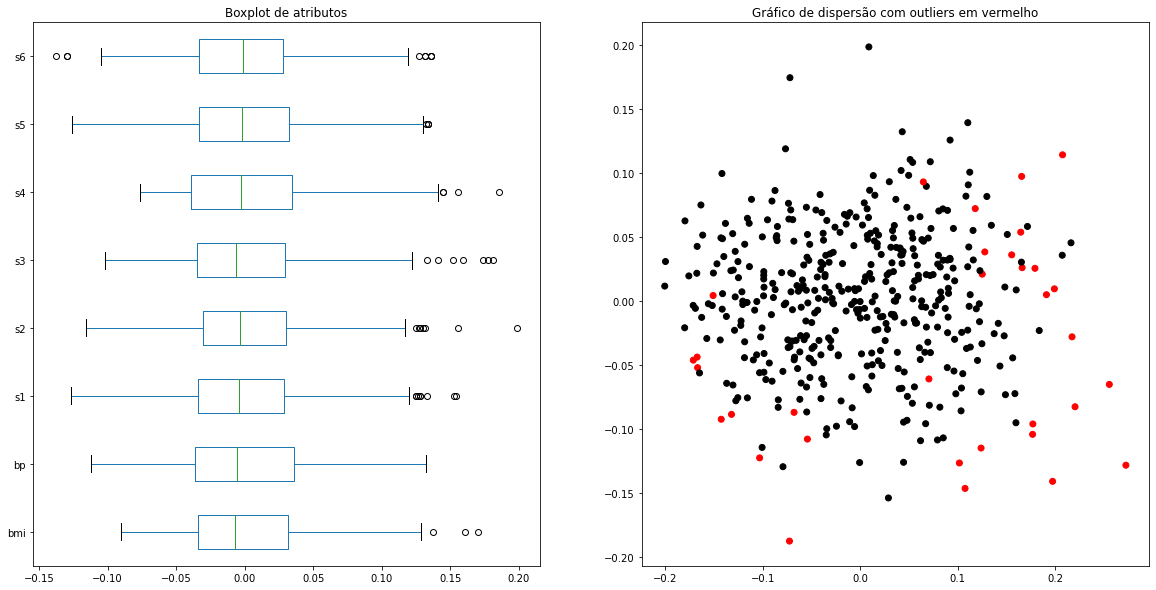

In [11]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

diabetes_X_select = diabetes_X.drop(["age", "sex"], axis="columns")

factor = 1.5
Q1 = diabetes_X_select.quantile(0.25)
Q3 = diabetes_X_select.quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):")
display(IQR)

lower_range = Q1 - (factor * IQR)
upper_range = Q3 + (factor * IQR)

diabetes_X_outliers = (
    (diabetes_X_select < lower_range) | 
    (diabetes_X_select > upper_range)
).any(axis="columns")
diabetes_X_IQR = diabetes_X[~diabetes_X_outliers]

print("\nNumero de outliers encontrados: {}\n".format(diabetes_X_outliers.sum()))

diabetes_X_pca = PCA(n_components=2).fit_transform(diabetes_X_select)

diabetes_X_fig, diabetes_X_axs = plt.subplots(1, 2)
diabetes_X_fig.set_figwidth(20)
diabetes_X_fig.set_figheight(10)

diabetes_X_select.plot.box(
    vert=False,
    ax=diabetes_X_axs[0],
    title="Boxplot de atributos")

diabetes_X_axs[1].scatter(
    x=diabetes_X_pca[:,0], y=diabetes_X_pca[:,1],
    c=["red" if i else "black" for i in diabetes_X_outliers])
diabetes_X_axs[1].set_title("Gráfico de dispersão com outliers em vermelho")

plt.show()

## Redução de dimensionalidade

Conjunto de dados [Wine](https://scikit-learn.org/stable/datasets/index.html#wine-dataset).

* PCA
* t-SNE

In [12]:
from sklearn.datasets import load_wine

wine_X, wine_Y = load_wine(as_frame=True, return_X_y=True)
wine_X.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

<br/>

**Principal Component Analysis (PCA)**

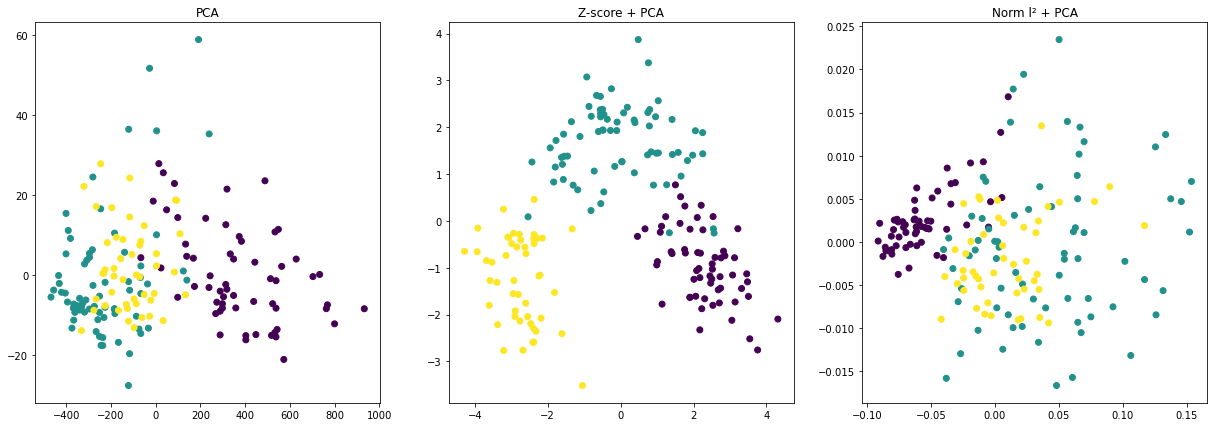

In [13]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# PCA
wine_pca = PCA(n_components=2).fit_transform(wine_X)

# z-score + PCA
wine_pca_std = make_pipeline(
    StandardScaler(),
    PCA(n_components=2)).fit_transform(wine_X)

# l2 norm + PCA
wine_pca_norm = make_pipeline(
    Normalizer(norm="l2"),
    PCA(n_components=2)).fit_transform(wine_X)

wine_fig, wine_axs = plt.subplots(1, 3)
wine_fig.set_figwidth(21)
wine_fig.set_figheight(7)

wine_axs[0].scatter(
    x=wine_pca[:,0], y=wine_pca[:,1],c=wine_Y
)
wine_axs[0].set_title("PCA")

wine_axs[1].scatter(
    x=wine_pca_std[:,0],
    y=wine_pca_std[:,1],
    c=wine_Y
)
wine_axs[1].set_title("Z-score + PCA")

wine_axs[2].scatter(
    x=wine_pca_norm[:,0],
    y=wine_pca_norm[:,1],
    c=wine_Y
)
wine_axs[2].set_title("Norm l² + PCA")

plt.show()

<br/>

**t-distributed Stochastic Neighbor Embedding (t-SNE)**

* [Scikit-Learn](https://scikit-learn.org/stable/modules/manifold.html#t-sne)
* [Página do autor](https://lvdmaaten.github.io/tsne/)

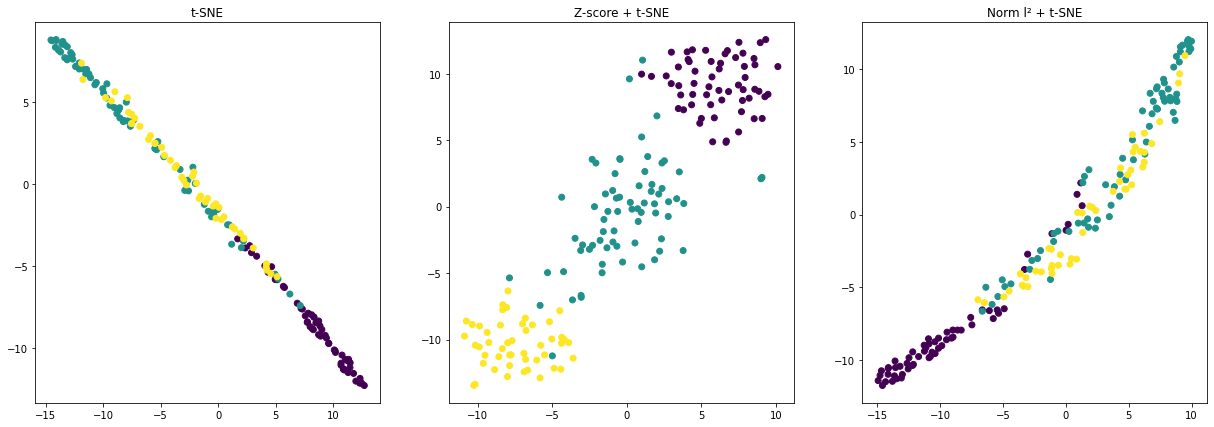

In [14]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

# t-SNE
wine_tsne = TSNE(n_components=2).fit_transform(wine_X)

# z-score + t-SNE
wine_tsne_std = make_pipeline(
    StandardScaler(),
    TSNE(n_components=2)).fit_transform(wine_X)

# l2 norm + t-SNE
wine_tsne_norm = make_pipeline(
    Normalizer(norm="l2"),
    TSNE(n_components=2)).fit_transform(wine_X)

wine_fig, wine_axs = plt.subplots(1, 3)
wine_fig.set_figwidth(21)
wine_fig.set_figheight(7)

wine_axs[0].scatter(
    x=wine_tsne[:,0], y=wine_tsne[:,1],c=wine_Y
)
wine_axs[0].set_title("t-SNE")

wine_axs[1].scatter(
    x=wine_tsne_std[:,0],
    y=wine_tsne_std[:,1],
    c=wine_Y
)
wine_axs[1].set_title("Z-score + t-SNE")

wine_axs[2].scatter(
    x=wine_tsne_norm[:,0],
    y=wine_tsne_norm[:,1],
    c=wine_Y
)
wine_axs[2].set_title("Norm l² + t-SNE")

plt.show()